# Import our package

In [1]:
import inclusion_calc as ic
import numpy as np

# Instantiate the package using a "pre-defined" excel file

In [2]:
calc = ic.BarInclusion()

# Example calculation of hp_teos
* Arguments are (Pressure in kbar, Temperature in Kelvin, phase)

In [3]:
calc.hp_teos(30, 300, 'zo')

13.211241036331948

# Example calculation of mix_elastic
* Arguments are (Inclusion Pressure, Entrapment Pressure, Entrapment Temperate, Inclusions, Hosts)
* Inclusions and Hosts will be a "dictionary"
* Example:  
    {phase: mole fraction}
* phase can be abbreviation or full name, cases are not necessary

In [4]:
incl_dict = {'ab': 1.0}
host_dict = {'Almandine': 1.0}
P_incl = 100 / 100  # MPa converted to kbar
P_entrap = 200 / 100  # MPa converted to kbar
T_entrap = 273.15 + 600  # Kelvin

# Example calculation of P_entrap_calc
* Arguments are (Inclusion Pressure, Entrapment Temperature, Inclusions, Hosts)
* Inclusions and Hosts will be a "dictionary"
* Example:  
    {phase: mole fraction}
* phase can be abbreviation or full name, cases are not necessary
* Entrapment Pressure is returned in kbar

In [5]:
P_out = calc.P_entrap_calc(P_incl, T_entrap, incl_dict, host_dict)
print('Entrapment pressure = {0:5.2f} kbar ({1:5.2f} MPa)'.format(P_out, 100*P_out))

Entrapment pressure =  3.15 kbar (315.37 MPa)


# Example calculation of T_entrap_calc
* Arguments are (Inclusion Pressure, Entrapment Pressure, Inclusions, Hosts)
* Inclusions and Hosts will be a "dictionary"
* Example:  
    {phase: mole fraction}
* phase can be abbreviation or full name, cases are not necessary
* Entrapment temperature is returned in Kelvin

In [6]:
T_out = calc.T_entrap_calc(P_incl, P_entrap, incl_dict, host_dict)
print('Entrapment temperature = {0:5.2f} K ({1:5.2f} C)'.format(T_out, T_out - 273.15))

Entrapment temperature = 271.28 K (-1.87 C)


# The calculation above seems to work. Checking a new one.

In [7]:
incl_dict = {'tpz': 0.5,
             'brucite': 0.5}
host_dict = {'epidote': 1.0}
P_incl = 200 / 100  # MPa converted to kbar
P_entrap = 1400 / 100  # MPa converted to kbar
T_entrap = 273.15 + 200  # Kelvin
P_out = calc.P_entrap_calc(P_incl, T_entrap, incl_dict, host_dict)
print('Entrapment pressure = {0:5.2f} kbar ({1:5.2f} MPa)'.format(P_out, 100*P_out))
T_out = calc.T_entrap_calc(P_incl, P_entrap, incl_dict, host_dict)
print('Entrapment temperature = {0:5.2f} K ({1:5.2f} C)'.format(T_out, T_out - 273.15))

Entrapment pressure = 13.21 kbar (1321.41 MPa)
Entrapment temperature = 513.32 K (240.17 C)


# This also seems to work just fine. However, the naming convention is a bit problematic.

# Now let's cycle through some inclusion pressure and entrapment temperatures (cycle through P = 100, 200, 300 MPa, T= 400-1000 C in 100 C increments)

In [8]:
incl_dict = {'ab': 1.0}
host_dict = {'Almandine': 1.0}
P_range = np.linspace(1, 4, 3)  # Range of pressures to calculate in kbar
T_range = np.linspace(400, 1000, 6) + 273.15  # Range of temperatures to calculate in K
P_entrap, T_mat, P_mat = calc.isobar_calc(T_range, P_range, incl_dict, host_dict)

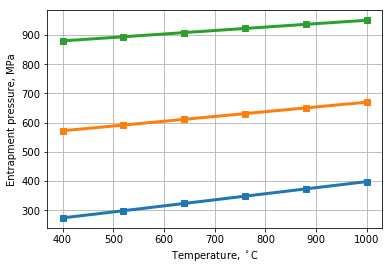

In [9]:
import matplotlib.pyplot as plt
plt.plot(T_mat.T - 273.15, 100*P_entrap.T, 's-', linewidth=3)
plt.xlabel('Temperature, $^\circ$C')
plt.ylabel('Entrapment pressure, MPa')
plt.grid('on')
plt.show()